In [1]:
import matplotlib.pyplot as plt
import scipy
import numpy as np
import pandas as pd
import collections
import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
import seaborn as sns
missing_values=["na","n/a","--","NaN",""," "]
df=pd.read_csv("Churn_Modelling.csv",na_values=missing_values).sample(n=5000)

In [2]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
878,879,15656333,Jen,574,France,Female,33,3,134348.57,1,1,0,63163.99,0
6764,6765,15645839,Yudin,570,France,Male,37,6,0.00,1,1,1,187758.50,0
5256,5257,15761497,Udinesi,713,Spain,Female,48,1,163760.82,1,0,0,157381.14,1
2888,2889,15658339,Pugliesi,795,Germany,Male,37,2,139265.63,2,1,1,198745.94,0
5336,5337,15700460,Allnutt,530,France,Female,55,4,120905.03,1,0,1,123475.88,1


In [3]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5860,5861,15723818,Carpenter,453,France,Female,37,4,131834.76,2,1,0,8949.20,0
5662,5663,15659937,Otutodilinna,703,France,Female,40,7,0.00,2,0,1,122518.50,0
7126,7127,15698271,Graham,523,France,Female,26,4,0.00,2,1,0,185488.81,0
7898,7899,15628144,Soares,635,France,Female,72,4,74812.84,1,0,1,27448.33,0
8969,8970,15622461,Ndubuagha,562,France,Female,51,7,122822.00,2,0,0,32626.21,0


Dataset Description-This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

In [4]:
#1
#Creating missing values
replaced = collections.defaultdict(set)
ix = [(row, col) for row in range(df.shape[0]) for col in [4,6,7,8,9,10,11,12,13]]#Indexes of all possible rows and selected columns
random.shuffle(ix)
to_replace = int(round(.0055*len(ix)))#0.0055*(9 columns)=5% total missing values
for row, col in ix:
    if len(replaced[row]) < df.shape[1] - 1:
        #df.iloc[row, col] = np.nan
        df.iloc[row, col] = random.choice(missing_values)
        to_replace -= 1
        replaced[row].add(col)
        if to_replace == 0:
            break
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
878,879,15656333,Jen,574,France,Female,33,3,134349,1,1,0,63164,0
6764,6765,15645839,Yudin,570,France,Male,37,6,0,1,1,1,187758,0
5256,5257,15761497,Udinesi,713,Spain,Female,48,1,163761,1,0,0,157381,1
2888,2889,15658339,Pugliesi,795,Germany,Male,37,2,139266,2,1,1,198746,0
5336,5337,15700460,Allnutt,530,France,Female,55,4,120905,1,0,1,123476,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860,5861,15723818,Carpenter,453,France,Female,37,4,131835,2,1,0,8949.2,0
5662,5663,15659937,Otutodilinna,703,France,Female,40,7,0,2,0,1,122518,0
7126,7127,15698271,Graham,523,France,Female,26,4,0,2,1,0,185489,0
7898,7899,15628144,Soares,635,France,Female,72,4,74812.8,1,0,1,27448.3,0


In [5]:
#Creating Inconsistent Data
inconsis_val=[["SPAIN","SPaIn","spain"],["GERMANY","GERmaNy","germany"],["FRANCE","FraNce","france"]]
replaced = collections.defaultdict(set)
ix = [(row, 4) for row in range(df.shape[0])]#Indexes of all possible rows and column
random.shuffle(ix)
to_replace = int(round(.0055*len(ix)))#0.0055*(9 columns)=5% Inconsistent Data
for row, col in ix:
    if len(replaced[row]) < df.shape[1] - 1:
        if df.iloc[row,col]=="Spain":
            df.iloc[row, col] = random.choice(inconsis_val[0])
        elif df.iloc[row,col]=="Germany":
            df.iloc[row, col] = random.choice(inconsis_val[1])
        elif df.iloc[row,col]=="France":
            df.iloc[row, col] = random.choice(inconsis_val[2])
        to_replace -= 1
        replaced[row].add(col)
        if to_replace == 0:
            break
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
878,879,15656333,Jen,574,France,Female,33,3,134349,1,1,0,63164,0
6764,6765,15645839,Yudin,570,France,Male,37,6,0,1,1,1,187758,0
5256,5257,15761497,Udinesi,713,Spain,Female,48,1,163761,1,0,0,157381,1
2888,2889,15658339,Pugliesi,795,Germany,Male,37,2,139266,2,1,1,198746,0
5336,5337,15700460,Allnutt,530,France,Female,55,4,120905,1,0,1,123476,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860,5861,15723818,Carpenter,453,France,Female,37,4,131835,2,1,0,8949.2,0
5662,5663,15659937,Otutodilinna,703,France,Female,40,7,0,2,0,1,122518,0
7126,7127,15698271,Graham,523,France,Female,26,4,0,2,1,0,185489,0
7898,7899,15628144,Soares,635,France,Female,72,4,74812.8,1,0,1,27448.3,0


In [6]:
#Creating repetition of observations
df=df.append([df.sample()]*5,ignore_index=True)
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,879,15656333,Jen,574,France,Female,33,3,134349,1,1,0,63164,0
1,6765,15645839,Yudin,570,France,Male,37,6,0,1,1,1,187758,0
2,5257,15761497,Udinesi,713,Spain,Female,48,1,163761,1,0,0,157381,1
3,2889,15658339,Pugliesi,795,Germany,Male,37,2,139266,2,1,1,198746,0
4,5337,15700460,Allnutt,530,France,Female,55,4,120905,1,0,1,123476,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5000,1330,15645572,Calabresi,743,France,Female,40,6,0,1,1,0,28280.8,1
5001,1330,15645572,Calabresi,743,France,Female,40,6,0,1,1,0,28280.8,1
5002,1330,15645572,Calabresi,743,France,Female,40,6,0,1,1,0,28280.8,1
5003,1330,15645572,Calabresi,743,France,Female,40,6,0,1,1,0,28280.8,1


In [7]:
#2-Exploratory Data Analysis
missing_df=pd.DataFrame()#To store all the rows with missing values
for col in df.columns[:14]:
  cnt=0
  for row in df[col].index:
    if df.loc[int(row),col] in missing_values:
      df.loc[int(row),col]=np.nan
      missing_df=missing_df.append([df.loc[int(row),:]])
missing_df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
47,176,15755209,Fu,484,NaN,Female,35.0,7.0,133868.21,1,1.0,1.0,27286.1,0.0
131,5065,15671243,Y?,558,NaN,Female,47.0,9.0,0.00,2,1.0,0.0,103787,0.0
317,653,15711889,Mao,668,NaN,Male,42.0,3.0,150461.07,1,1.0,0.0,108139,0.0
700,2564,15645463,Udinese,843,NaN,Female,27.0,5.0,0.00,2,1.0,1.0,67494.2,0.0
721,1629,15810347,Todd,662,NaN,Female,30.0,9.0,0.00,2,0.0,1.0,157885,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3946,4811,15799186,Sagese,632,France,Male,38.0,4.0,0.00,2,0.0,0.0,192506,NaN
4225,6060,15627854,Mai,707,Spain,Male,44.0,3.0,0.00,2,1.0,1.0,135077,NaN
4755,5931,15645744,Chukwudi,826,France,Female,30.0,5.0,0.00,2,0.0,1.0,157398,NaN
4923,1761,15701121,Holt,521,France,Male,38.0,5.0,110641.18,1,0.0,1.0,136508,NaN


In [8]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,879,15656333,Jen,574,France,Female,33,3,134349,1,1,0,63164,0
1,6765,15645839,Yudin,570,France,Male,37,6,0,1,1,1,187758,0
2,5257,15761497,Udinesi,713,Spain,Female,48,1,163761,1,0,0,157381,1
3,2889,15658339,Pugliesi,795,Germany,Male,37,2,139266,2,1,1,198746,0
4,5337,15700460,Allnutt,530,France,Female,55,4,120905,1,0,1,123476,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5000,1330,15645572,Calabresi,743,France,Female,40,6,0,1,1,0,28280.8,1
5001,1330,15645572,Calabresi,743,France,Female,40,6,0,1,1,0,28280.8,1
5002,1330,15645572,Calabresi,743,France,Female,40,6,0,1,1,0,28280.8,1
5003,1330,15645572,Calabresi,743,France,Female,40,6,0,1,1,0,28280.8,1


RowNumber           0
CustomerId          0
Surname             0
CreditScore         0
Geography          20
Gender              0
Age                25
Tenure             25
Balance            35
NumOfProducts      26
HasCrCard          25
IsActiveMember     26
EstimatedSalary    36
Exited             29
dtype: int64
Total: 247


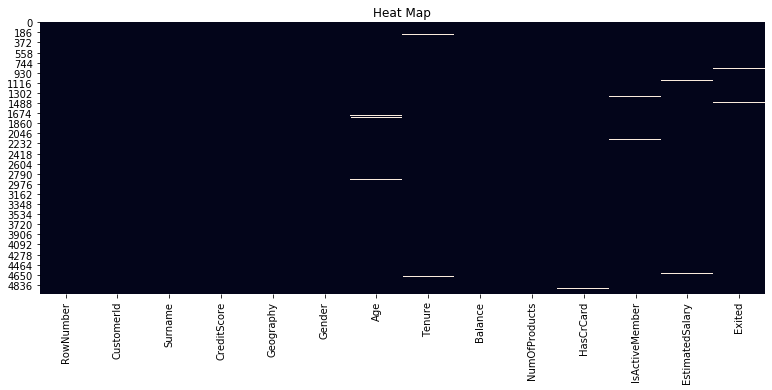

In [9]:
#Total Missing Values for each Feature
print(df.isnull().sum())
print("Total:",df.isnull().sum().sum())
#Visualisation of missing values using Heat Map
plt.figure(figsize=(13,5))
plt.title("Heat Map")
sns.heatmap(df.isnull(),cbar=False)
plt.show()

In [10]:
#Handling Missing Values-By replacing with appropriate value
for col in [6,7,9,10,11,12,13]:
  median=df.iloc[:,col].median()
  df.iloc[:,col].fillna(median,inplace=True)
#For Numerical Values
for col in [8,12]:
  mean=df.iloc[:,col].mean()
  df.iloc[:,col].fillna(mean,inplace=True)
#For Categorical Values
mode=df.iloc[:,4].mode()[0]
df.iloc[:,4].fillna(mode,inplace=True)
print(df.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


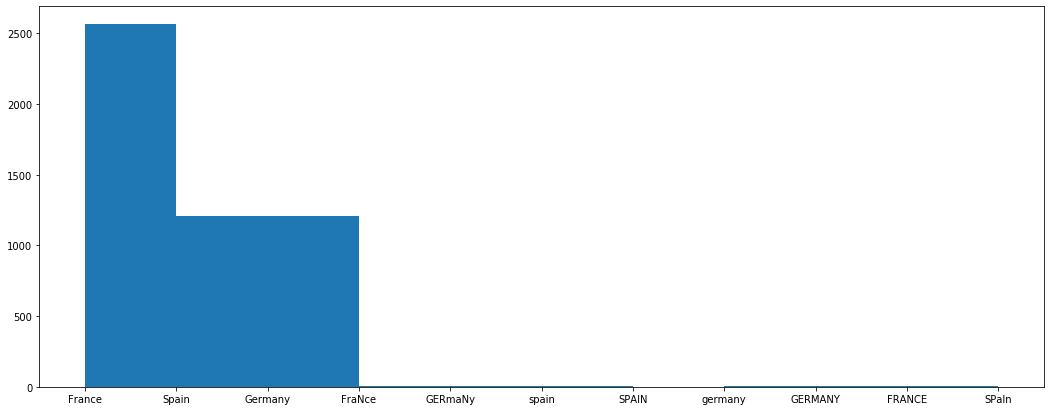

In [11]:
#Handling Inconsistent data
plt.figure(figsize=(18,7))
plt.hist(df.Geography)
plt.show()

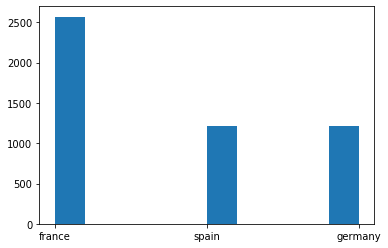

In [12]:
df.Geography=df.Geography.str.lower()
plt.hist(df.Geography)
plt.show()

In [13]:
#Handle repetitive values
df.drop_duplicates(keep="first",inplace=True)
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,879,15656333,Jen,574,france,Female,33.0,3.0,134348.57,1.0,1.0,0.0,63163.99,0.0
1,6765,15645839,Yudin,570,france,Male,37.0,6.0,0.00,1.0,1.0,1.0,187758.50,0.0
2,5257,15761497,Udinesi,713,spain,Female,48.0,1.0,163760.82,1.0,0.0,0.0,157381.14,1.0
3,2889,15658339,Pugliesi,795,germany,Male,37.0,2.0,139265.63,2.0,1.0,1.0,198745.94,0.0
4,5337,15700460,Allnutt,530,france,Female,55.0,4.0,120905.03,1.0,0.0,1.0,123475.88,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,5861,15723818,Carpenter,453,france,Female,37.0,4.0,131834.76,2.0,1.0,0.0,8949.20,0.0
4996,5663,15659937,Otutodilinna,703,france,Female,40.0,7.0,0.00,2.0,0.0,1.0,122518.50,0.0
4997,7127,15698271,Graham,523,france,Female,26.0,4.0,0.00,2.0,1.0,0.0,185488.81,0.0
4998,7899,15628144,Soares,635,france,Female,72.0,4.0,74812.84,1.0,0.0,1.0,27448.33,0.0


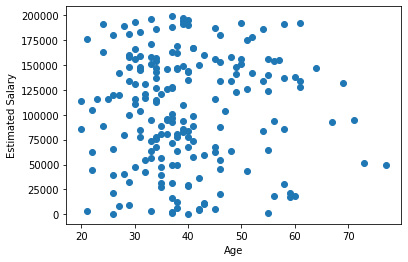

In [14]:
#Scatter Plot
plt.scatter(df.Age[:200],df.EstimatedSalary[:200])
plt.ylabel("Estimated Salary")
plt.xlabel("Age")
plt.show()

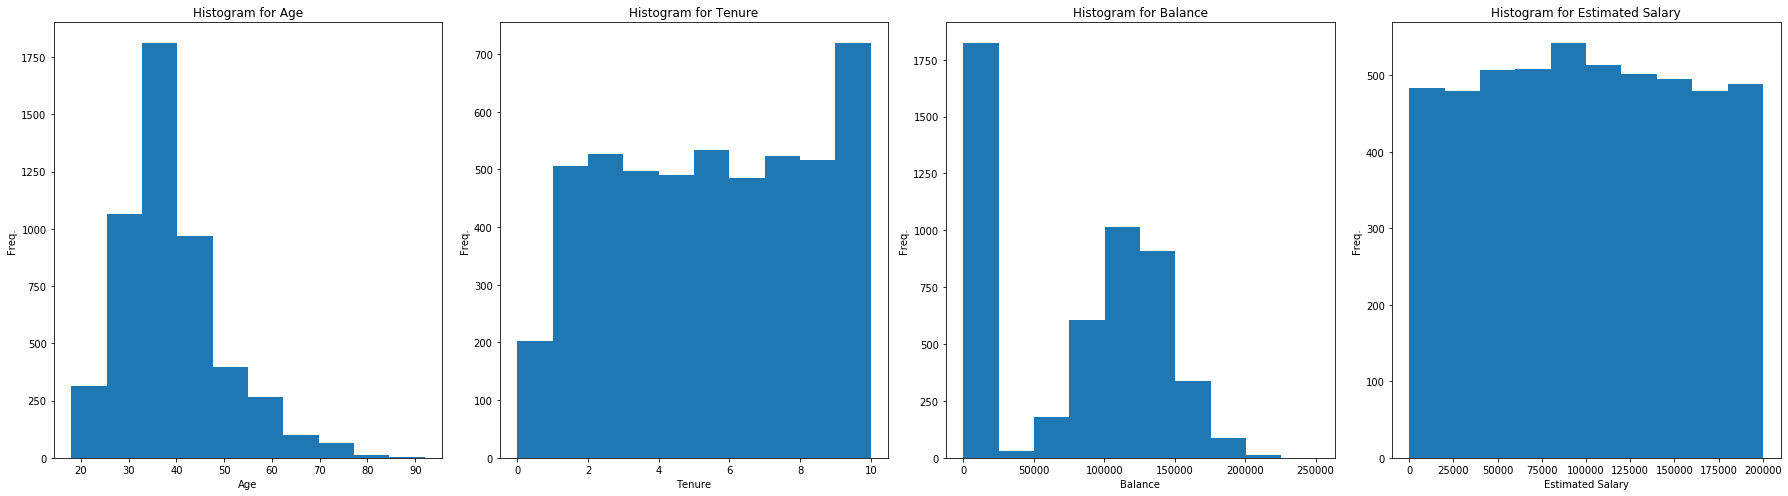

In [15]:
#Graph Visualization
#histogram
plt.figure(figsize=(25,7))
plt.subplot(141)
plt.title("Histogram for Age")
plt.hist(df.Age,bins=10)
plt.xlabel("Age")
plt.ylabel("Freq.")

plt.subplot(142)
plt.title("Histogram for Tenure")
plt.hist(df.Tenure)
plt.xlabel("Tenure")
plt.ylabel("Freq.")

plt.subplot(143)
plt.title("Histogram for Balance")
plt.hist(df.Balance)
plt.xlabel("Balance")
plt.ylabel("Freq.")

plt.subplot(144)
plt.title("Histogram for Estimated Salary")
plt.hist(df.EstimatedSalary)
plt.xlabel("Estimated Salary")
plt.ylabel("Freq.")
plt.tight_layout()
plt.show()

From the above plots we can conclude that the Age feature is right skewed.

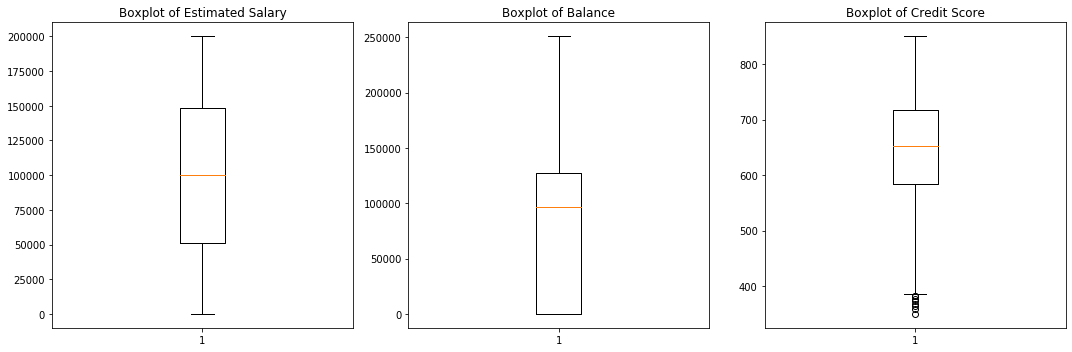

In [16]:
#boxplot
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.title("Boxplot of Estimated Salary")
plt.boxplot(df.EstimatedSalary)

plt.subplot(132)
plt.title("Boxplot of Balance")
plt.boxplot(df.Balance)

plt.subplot(133)
plt.title("Boxplot of Credit Score")
plt.boxplot(df.CreditScore)
plt.tight_layout()
plt.show()


> Conclusions-Credit Score feature has outliers which needs to be filtered out.

In [17]:
#Handling Outliers
Q1=df.CreditScore.quantile(0.25)
Q3=df.CreditScore.quantile(0.75)
IQR=Q3-Q1
min_credit=Q1-(1.5)*IQR
max_credit=Q3+(1.5)*IQR
print("Min value:",min_credit)
print("Total number of Outliers:",((df.CreditScore<min_credit)==True).sum())

#Filter values below min_credit
isit_outlier=~(df.CreditScore.between(min_credit,max_credit))
outlier_indexes=df.CreditScore[isit_outlier].index
print("Outlier Indexes:",outlier_indexes)
df.drop(outlier_indexes, inplace=True)
df

Min value: 384.5
Total number of Outliers: 8
Outlier Indexes: Int64Index([42, 76, 2260, 2508, 3168, 3960, 4400, 4531], dtype='int64')


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,879,15656333,Jen,574,france,Female,33.0,3.0,134348.57,1.0,1.0,0.0,63163.99,0.0
1,6765,15645839,Yudin,570,france,Male,37.0,6.0,0.00,1.0,1.0,1.0,187758.50,0.0
2,5257,15761497,Udinesi,713,spain,Female,48.0,1.0,163760.82,1.0,0.0,0.0,157381.14,1.0
3,2889,15658339,Pugliesi,795,germany,Male,37.0,2.0,139265.63,2.0,1.0,1.0,198745.94,0.0
4,5337,15700460,Allnutt,530,france,Female,55.0,4.0,120905.03,1.0,0.0,1.0,123475.88,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,5861,15723818,Carpenter,453,france,Female,37.0,4.0,131834.76,2.0,1.0,0.0,8949.20,0.0
4996,5663,15659937,Otutodilinna,703,france,Female,40.0,7.0,0.00,2.0,0.0,1.0,122518.50,0.0
4997,7127,15698271,Graham,523,france,Female,26.0,4.0,0.00,2.0,1.0,0.0,185488.81,0.0
4998,7899,15628144,Soares,635,france,Female,72.0,4.0,74812.84,1.0,0.0,1.0,27448.33,0.0


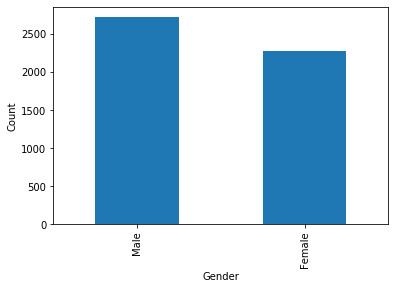

In [18]:
#Bar Chart
df.Gender.value_counts().plot(kind='bar')
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

         RowNumber    CustomerId  CreditScore          Age       Tenure  \
count  4992.000000  4.992000e+03  4992.000000  4992.000000  4992.000000   
mean   5025.059696  1.569016e+07   651.406651    38.936098     5.016627   
std    2902.275854  7.188691e+04    94.919887    10.515549     2.868647   
min       1.000000  1.556571e+07   386.000000    18.000000     0.000000   
25%    2504.750000  1.562850e+07   585.000000    32.000000     3.000000   
50%    5025.000000  1.568870e+07   652.000000    37.000000     5.000000   
75%    7538.750000  1.575206e+07   717.000000    44.000000     7.000000   
max    9998.000000  1.581569e+07   850.000000    92.000000    10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count    4992.000000    4992.000000  4992.000000     4992.000000   
mean    75918.164371       1.525641     0.705128        0.515425   
std     62132.419982       0.585800     0.456031        0.499812   
min         0.000000       1.000000     0.000000    

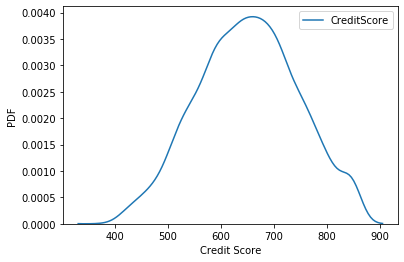

In [19]:
#4-Normalisation and Standardization
print(df.describe())#Descriptive Statistics
print("Mean of CreditScore feature",np.mean(df.CreditScore),"and its variance is",np.var(df.CreditScore))
sns.kdeplot(df.CreditScore)
plt.xlabel("Credit Score")
plt.ylabel('PDF')
plt.show()

Box-Cox method is a data transform method that is able to perform a range of power transforms, including the log(for exponential) and the square root(for skewed).
Boxcox function takes an argument, called lambda, that controls the type of transform to perform.
*   lambda = -1. is a reciprocal transform.
*   lambda = -0.5 is a reciprocal square root transform.
*   lambda = 0.0 is a log transform.
*   lambda = 0.5 is a square root transform.
*   lambda = 1.0 is no transform.

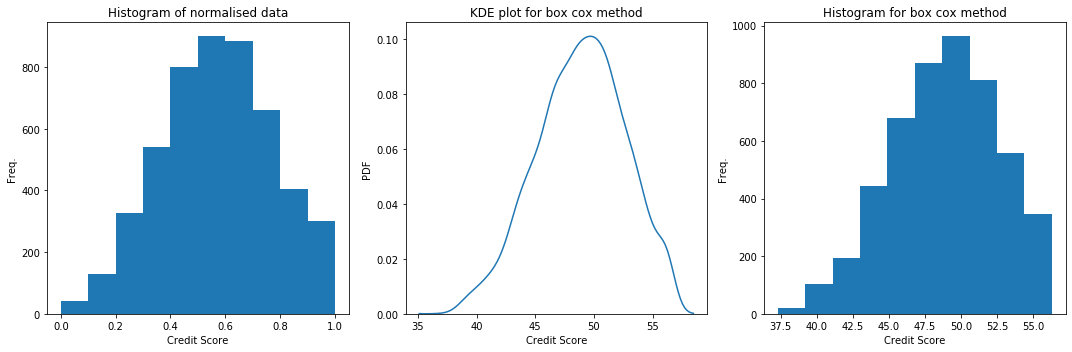

In [34]:
# fit scaler on training data
normalize = MinMaxScaler()

numerical_df=df[["CreditScore","Tenure","Balance","EstimatedSalary"]]
# transform training data
norm_df = normalize.fit(numerical_df).transform(numerical_df)
#Convert to table format - MinMaxScaler
df_norm = pd.DataFrame(data=norm_df, columns=["CreditScore","Tenure","Balance","EstimatedSalary"])
df_norm

#sns.kdeplot(df_norm.CreditScore)
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.hist(df_norm.CreditScore)
plt.title("Histogram of normalised data")
plt.xlabel("Credit Score")
plt.ylabel('Freq.')

#Boxcox Method 
plt.subplot(132)
dfCreditScore_norm=scipy.stats.boxcox(df.CreditScore,0.5)
sns.kdeplot(dfCreditScore_norm)
plt.title("KDE plot for box cox method")
plt.xlabel("Credit Score")
plt.ylabel("PDF")


plt.subplot(133)
plt.hist(dfCreditScore_norm)
plt.title("Histogram for box cox method")
plt.xlabel("Credit Score")
plt.ylabel('Freq.')
plt.tight_layout()
plt.show()

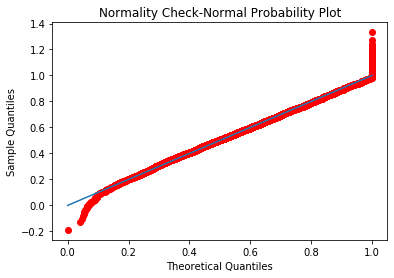

In [21]:
#normality check for dfCreditScore_norm
def normality_check(data):
  pos=[]
  th_Q=[]
  data=np.sort(np.array(data))
  pos=[(i-0.5)/len(data) for i in range(1,len(data)+1)]
  th_Q=[norm.ppf(i,np.mean(data),np.std(data,ddof=1)) for i in pos]
  plt.title("Normality Check-Normal Probability Plot")
  plt.plot(data,th_Q,'ro',data,data)
  plt.xlabel("Theoretical Quantiles")
  plt.ylabel("Sample Quantiles")
  plt.show()
normality_check(df_norm.CreditScore)


> Hence, from the above plot we can conclude that the data is approx. normal



      CreditScore    Tenure   Balance  EstimatedSalary
0       -0.815576 -0.703059  0.940512        -0.642189
1       -0.857721  0.342835 -1.221999         1.537482
2        0.648963 -1.400322  1.413939         1.006057
3        1.512936 -1.051690  1.019658         1.729698
4       -1.279171 -0.354428  0.724121         0.412914
...           ...       ...       ...              ...
4987    -2.090463 -0.354428  0.900049        -1.590629
4988     0.543601  0.691466 -1.221999         0.396166
4989    -1.352925 -0.354428 -1.221999         1.497776
4990    -0.172865 -0.354428 -0.017792        -1.267003
4991    -0.942011  0.691466  0.754977        -1.176420

[4992 rows x 4 columns]


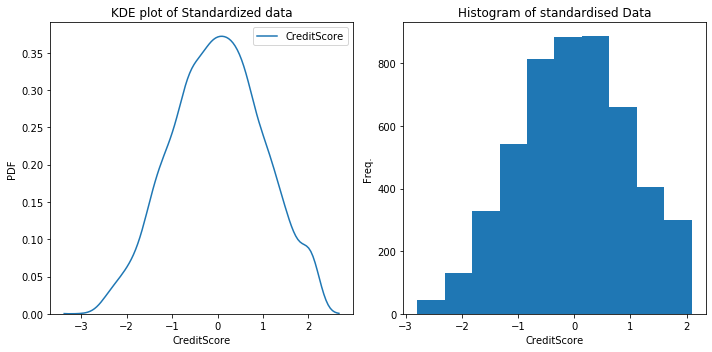

In [22]:
#Standardization
sc = StandardScaler()
sc_df = sc.fit_transform(df_norm)
#Convert to table format - StandardScaler 
df_standardized = pd.DataFrame(data=sc_df, columns=["CreditScore","Tenure","Balance","EstimatedSalary"])
print(df_standardized)

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title("KDE plot of Standardized data")
sns.kdeplot(df_standardized.CreditScore)
plt.xlabel("CreditScore")
plt.ylabel('PDF')

plt.subplot(122)
plt.title("Histogram of standardised Data")
plt.hist(df_standardized.CreditScore)
plt.xlabel("CreditScore")
plt.ylabel('Freq.')
plt.tight_layout()
plt.show()

In [23]:
#df_standardized.describe()
print("Descriptive Statistics of:");
print("Nomalised Data:\n",pd.DataFrame(data=dfCreditScore_norm,columns=["CreditScore"]).describe())
print("\nStandardised Data:\n",df_standardized.CreditScore.describe())

Descriptive Statistics of:
Nomalised Data:
        CreditScore
count  4992.000000
mean     48.907231
std       3.752769
min      37.293765
25%      46.373546
50%      49.068581
75%      51.553711
max      56.309519

Standardised Data:
 count    4.992000e+03
mean     1.231431e-16
std      1.000100e+00
min     -2.796392e+00
25%     -6.996774e-01
50%      6.251680e-03
75%      6.911083e-01
max      2.092430e+00
Name: CreditScore, dtype: float64


Reasoning-We have standardised the CreditScore column so that we get mu=0 and std=1 and then we can apply Z-score to get the percentage of customers satisfying certain condition.

In [24]:
#Z-score
#Suppose we need to find the percentage of customers having credit score>700
mu_CS=df['CreditScore'].mean()
std_CS=df['CreditScore'].std()
x=700
z=(x-mu_CS)/std_CS
print("P(X>",x,")")
print("P(Z>",z,")=",1-norm.cdf(z))

P(X> 700 )
P(Z> 0.511940658488828 )= 0.3043462707148734


In [25]:
#5-Hypothesis testing
#Hypothesis for the column 'EstimatedSalary'
#H0- mu=xbar
#H1- mu!=xbar
#Let alpha be 0.05
from statsmodels.stats import weightstats as stests
xbar=df['EstimatedSalary'].mean()
ztest ,pval = stests.ztest(df['EstimatedSalary'].sample(n=1000), x2=None, value=xbar,alternative='two-sided')
print("P value:",float(pval))
if pval<0.05:
    print(pval,"<0.05")
    print("Reject null hypothesis.")
    print("Hence mu!=xbar")
else:
    print(pval,">0.05")
    print("Failed to reject null hypothesis.")
    print("Hence,both H0 and H1 are plausible.")

P value: 0.2506455804090848
0.2506455804090848 >0.05
Failed to reject null hypothesis.
Hence,both H0 and H1 are plausible.


Conclusion-Both H0 and H1 are plausible.

In [26]:
#6-Correlation
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,879,15656333,Jen,574,france,Female,33.0,3.0,134348.57,1.0,1.0,0.0,63163.99,0.0
1,6765,15645839,Yudin,570,france,Male,37.0,6.0,0.00,1.0,1.0,1.0,187758.50,0.0
2,5257,15761497,Udinesi,713,spain,Female,48.0,1.0,163760.82,1.0,0.0,0.0,157381.14,1.0
3,2889,15658339,Pugliesi,795,germany,Male,37.0,2.0,139265.63,2.0,1.0,1.0,198745.94,0.0
4,5337,15700460,Allnutt,530,france,Female,55.0,4.0,120905.03,1.0,0.0,1.0,123475.88,1.0


In [27]:
df.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,-0.000927,-0.006327,-0.003955,0.005760,-0.006660,0.015728,0.012988,0.013267,0.013378,-0.016817
CustomerId,-0.000927,1.000000,0.001874,-0.003440,0.000729,-0.003828,0.020258,-0.003263,0.001091,0.001160,-0.004248
CreditScore,-0.006327,0.001874,1.000000,-0.003739,0.009665,-0.005263,0.016647,0.002757,0.036631,0.000992,-0.008324
Age,-0.003955,-0.003440,-0.003739,1.000000,-0.014411,0.019343,-0.020469,-0.016047,0.087811,-0.014079,0.282308
Tenure,0.005760,0.000729,0.009665,-0.014411,1.000000,-0.011075,0.021744,0.032542,-0.027079,0.007861,-0.017850
Balance,-0.006660,-0.003828,-0.005263,0.019343,-0.011075,1.000000,-0.291439,-0.015095,-0.001861,0.002066,0.116281
NumOfProducts,0.015728,0.020258,0.016647,-0.020469,0.021744,-0.291439,1.000000,0.004308,0.016099,0.011192,-0.023227
HasCrCard,0.012988,-0.003263,0.002757,-0.016047,0.032542,-0.015095,0.004308,1.000000,-0.015203,-0.011955,-0.003302
IsActiveMember,0.013267,0.001091,0.036631,0.087811,-0.027079,-0.001861,0.016099,-0.015203,1.000000,-0.015039,-0.142801
EstimatedSalary,0.013378,0.001160,0.000992,-0.014079,0.007861,0.002066,0.011192,-0.011955,-0.015039,1.000000,0.003744


In [28]:
df_corr_churn=df[['Balance','EstimatedSalary']]
df_corr_churn

,Balance,EstimatedSalary
0,134348.57,63163.99
1,0.00,187758.50
2,163760.82,157381.14
3,139265.63,198745.94
4,120905.03,123475.88
...,...,...
4995,131834.76,8949.20
4996,0.00,122518.50
4997,0.00,185488.81
4998,74812.84,27448.33


In [29]:
df_corr_churn.sample(n=500).corr()

,Balance,EstimatedSalary
Balance,1.000000,-0.042575
EstimatedSalary,-0.042575,1.000000


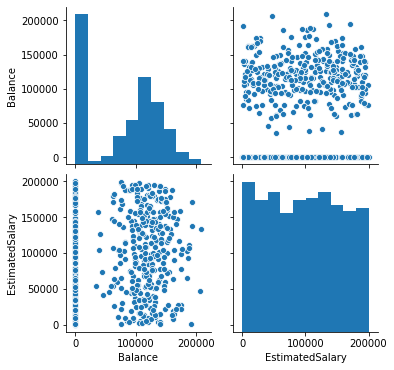

In [30]:
sns.pairplot(df_corr_churn.sample(n=500))
plt.show()

Inferences-Neutral Correlation